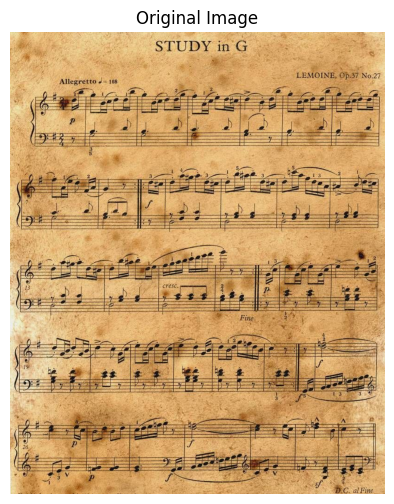

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/yashwanthr/Downloads/noised.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Function to display images in the notebook
def show_image(title, img, cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

# Display the original input image
show_image('Original Image', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


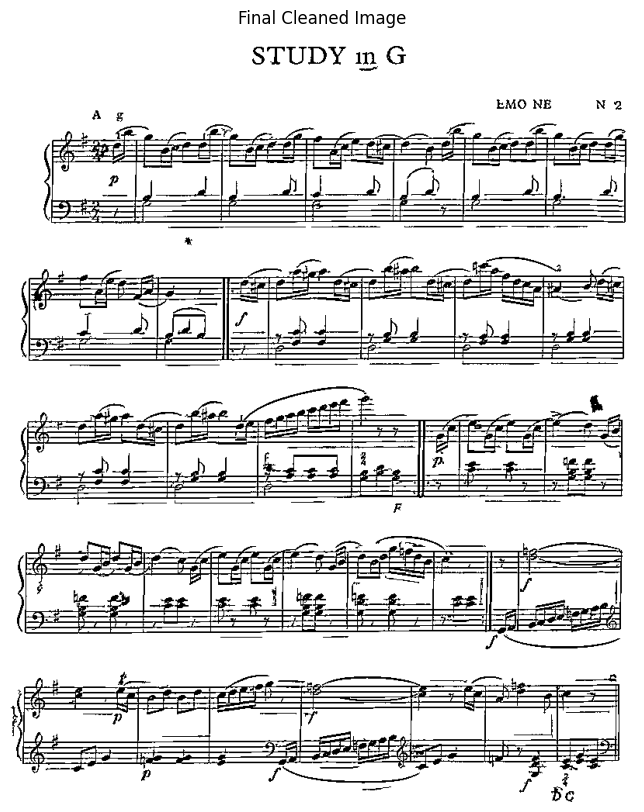

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy image
image_path = "/Users/yashwanthr/Downloads/noised.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Perform denoising using OpenCV's fastNlMeansDenoising function
# Reduce 'h' to preserve more details (originally 25, now reduced to 10)
denoised_image = cv2.fastNlMeansDenoising(image, None, h=20, templateWindowSize=17, searchWindowSize=28)

# Step 2: Apply adaptive thresholding to better handle varying lighting conditions
binary_image = cv2.adaptiveThreshold(denoised_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Step 3: Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Create an output image to hold the components
output_image = np.zeros_like(binary_image)

# Step 4: Iterate through each component, skipping the first one as it's the background
for i in range(1, num_labels):
    # Create a mask for the current component
    component_mask = (labels == i).astype("uint8") * 255
    
    # Keep components larger than a certain threshold size (50 pixels) to preserve more details
    if stats[i, cv2.CC_STAT_AREA] > 50:
        output_image = cv2.bitwise_or(output_image, component_mask)

# Step 5: Invert the image back to original white objects
output_image = cv2.bitwise_not(output_image)

# Step 6: Sharpen the image using a kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_image = cv2.filter2D(output_image, -1, kernel)

# Step 7: Adjust contrast and brightness
alpha = 1.5  # Contrast control
beta = 50    # Brightness control
enhanced_image = cv2.convertScaleAbs(sharpened_image, alpha=alpha, beta=beta)

# Step 8: Automatic border detection and cropping
gray = cv2.cvtColor(enhanced_image, cv2.COLOR_GRAY2BGR)
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crop based on the largest contour found
if contours:
    x, y, w, h = cv2.boundingRect(contours[0])
    cropped_img = enhanced_image[y:y+h, x:x+w]
else:
    cropped_img = enhanced_image  # In case no contours are found

# Save the final cleaned and enhanced image
cv2.imwrite("cleaned_image_final.png", cropped_img)

# Display the final cleaned and enhanced image in the notebook
plt.figure(figsize=(10, 10))
plt.imshow(cropped_img, cmap='gray')
plt.title('Final Cleaned Image')
plt.axis('off')
plt.show()
